In [1]:
!pip install imblearn

# Classification of Reviews using Natural Language Processing

In [2]:
#Importing all the required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import warnings
import plotly.graph_objs as go
warnings.filterwarnings("ignore")

In [3]:
#Read the Produc review CSV file
Data = pd.read_csv("GrammarandProductReviews.csv")

In [4]:
#Displaying the first 3 records of the dataframe
Data.head(3)

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   

                                          categories             dateAdded  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...  2017-07-25T00:52:42Z   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   

            dateUpdated          ean  \
0  2018-02-05T08:36:58Z  6.02537E+11   
1  2018-02-05T11:27:45Z  73416000391   
2  2018-02-05T11:27:45Z  73416000391   

                                                keys  \
0  602537205981,universalmusic/14331328,universal...   
1  lundbergorganiccinnamontoastricecakes/b000fvzw...   
2  lundbergorganiccinnamontoastricecakes/b000fvzw...   

                         manufacturer manufacturerNumber  \
0  Universal Music Group / Cash Money           14331328   
1                            Lundberg             574764   
2                            Lundberg             574764   

                                         name  ...   reviews.id  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  ...          NaN   
1  Lundberg Organic Cinnamon Toast Rice Cakes  ...  100209113.0   
2  Lundberg Organic Cinnamon Toast Rice Cakes  ...  100209113.0   

  reviews.numHelpful reviews.rating  \
0                0.0              5   
1                NaN              5   
2                NaN              5   

                                  reviews.sourceURLs  \
0  https://redsky.target.com/groot-domain-api/v1/...   
1   https://www.walmart.com/reviews/product/29775278   
2   https://www.walmart.com/reviews/product/29775278   

                                        reviews.text  reviews.title  \
0  i love this album. it's very good. more to the...   Just Awesome   
1  Good flavor. This review was collected as part...           Good   
2                                       Good flavor.           Good   

   reviews.userCity  reviews.userProvince reviews.username          upc  
0       Los Angeles                   NaN           Joshua  6.02537E+11  
1               NaN                   NaN        Dorothy W  73416000391  
2               NaN                   NaN        Dorothy W  73416000391  

[3 rows x 25 columns]

In [5]:
#Displaying the rows and columns of the data frame
Data.shape

(71044, 25)

In [6]:
#Display the type of columns
Data.dtypes

id                       object
brand                    object
categories               object
dateAdded                object
dateUpdated              object
ean                      object
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating            int64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity         object
reviews.userProvince     object
reviews.username         object
upc                      object
dtype: object

In [7]:
#The data description of numerical columns
Data.describe()

reviews.id  reviews.numHelpful  reviews.rating
count  3.215800e+04        32508.000000    71044.000000
mean   7.944753e+07            0.410422        4.385747
std    4.842696e+07            3.574442        1.067659
min    2.187400e+04            0.000000        1.000000
25%    3.355342e+07            0.000000        4.000000
50%    7.124763e+07            0.000000        5.000000
75%    1.112628e+08            0.000000        5.000000
max    1.038227e+09          183.000000        5.000000

In [8]:
#The covariance provides the variance between 2 columns in the data frame
Data.cov()

reviews.id  reviews.numHelpful  reviews.rating
reviews.id          2.345170e+15       -4.828091e+07   -3.106680e+06
reviews.numHelpful -4.828091e+07        1.277664e+01   -1.397407e-02
reviews.rating     -3.106680e+06       -1.397407e-02    1.139896e+00

In [9]:
#The correlation between two variables, the -ve values represent the negative correlation, whereasw the positve values represent +ve correlated values
Data.corr()

reviews.id  reviews.numHelpful  reviews.rating
reviews.id            1.000000           -0.158874       -0.054355
reviews.numHelpful   -0.158874            1.000000       -0.004612
reviews.rating       -0.054355           -0.004612        1.000000

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews.date          70977 non-null  object 
 11  reviews.dateAdded     71044 non-null  object 
 12  reviews.dateSeen      71044 non-null  object 
 13  reviews.didPurchase   32158 non-null  object 
 14  reviews.doRecommend   60429 non-null  object 
 15  reviews.id         

## Finding the redundant columns/outliers in the data

## Exploratory Data Analysis using Visualizations and preprocessing of data

### Is there any geographical impact of reviews and rating?

In [11]:
Data['reviews.rating'] = Data['reviews.rating'].apply(int)

In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews.date          70977 non-null  object 
 11  reviews.dateAdded     71044 non-null  object 
 12  reviews.dateSeen      71044 non-null  object 
 13  reviews.didPurchase   32158 non-null  object 
 14  reviews.doRecommend   60429 non-null  object 
 15  reviews.id         

In [13]:
sdf = Data

In [14]:
#Taking only state wise mean
sdf = Data.groupby(['reviews.userProvince'])
sdf2 = sdf['reviews.rating'].mean().to_frame(name = 'mean').reset_index()

In [15]:
sdf2.head()

reviews.userProvince      mean
0                   AL  3.625000
1                   AR  4.333333
2                   AZ  3.818182
3                   CA  3.600000
4                   CO  3.545455

### Statewise average rating 

In [16]:
import plotly.express as px
fig = px.choropleth(sdf2,
                    locations='reviews.userProvince', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='mean',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()

From the above plot it could be inferred that DE state has the least average rating and NE,NY, MA,PA,KY,OK states has the highest rating.

In [17]:
#sdf = Data[Data['reviews.id'].notna()]

In [18]:
sdf = Data.groupby(['reviews.userProvince']).count()['id']

#### Bar plot to visualize the statewise ratings count

<AxesSubplot:xlabel='reviews.userProvince'>

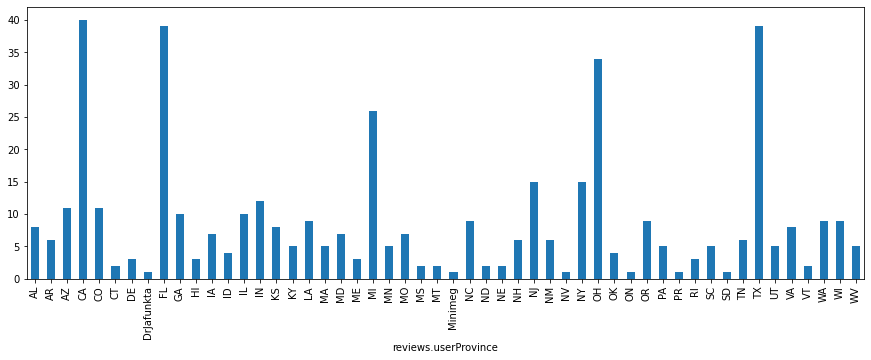

In [19]:
sdf.plot.bar(figsize=(15,5))


From the above plot, it could be inferred that CA state people have provided more ratings than the other state people.

In [20]:
print(sdf)

reviews.userProvince
AL             8
AR             6
AZ            11
CA            40
CO            11
CT             2
DE             3
DrJafunkta     1
FL            39
GA            10
HI             3
IA             7
ID             4
IL            10
IN            12
KS             8
KY             5
LA             9
MA             5
MD             7
ME             3
MI            26
MN             5
MO             7
MS             2
MT             2
Minimeg        1
NC             9
ND             2
NE             2
NH             6
NJ            15
NM             6
NV             1
NY            15
OH            34
OK             4
ON             1
OR             9
PA             5
PR             1
RI             3
SC             5
SD             1
TN             6
TX            39
UT             5
VA             8
VT             2
WA             9
WI             9
WV             5
Name: id, dtype: int64


In [21]:
sdf.sum()

449

**Observations of state wise analysis on the reviews and review rating**
1. Based on the choropleth map, it appears that people from certain states, such as NE, NY, MA, PA, KY, and OK, have given higher average ratings than people from other states.
2. The data suggests that California residents have provided more ratings compared to residents of other states.
3. Out of a total of 70,000 records, only 449 include information about the reviewer's state. Therefore, it is difficult to draw conclusions about the impact of state on the ratings provided based on this limited sample size.

Review ID is the unique ID of the review, hence checking whether the data has any duplicate reviews

In [22]:
len(Data['reviews.id'].unique())


31375

As per the above count, we can see that the remaining columns are the old reviews, which needs to be removed

In [23]:
df = Data


In [24]:
#Review Id should contain some value hence we are dropping rows that review ID has null values
df = df[df['reviews.id'].notna()]

In [25]:
df['reviews.id'] = df['reviews.id'].apply(int)

In [26]:
df['reviews.dateAdded'] = pd.to_datetime(df['reviews.dateAdded'])

In [27]:
#Sorting the dataframe based on the review ID and the review date
df = df.sort_values(by = ['reviews.id', 'reviews.dateAdded'], ascending = [True, False])

In [28]:
df.head(4)

id                brand  \
1825  AVpe38Uy1cnluZ0-YuJR  Target.com Use Only   
1302  AV1YqAaMGV-KLJ3adiDj           Neutrogena   
1288  AV1YqAaMGV-KLJ3adiDj           Neutrogena   
1293  AV1YqAaMGV-KLJ3adiDj           Neutrogena   

                                             categories             dateAdded  \
1825  Movies, Music & Books,Movies,Music,All MGM Tit...  2015-11-07T09:39:07Z   
1302  Personal Care,Sun Care,Spray-on Sunscreen SPF ...  2017-07-19T02:23:13Z   
1288  Personal Care,Sun Care,Spray-on Sunscreen SPF ...  2017-07-19T02:23:13Z   
1293  Personal Care,Sun Care,Spray-on Sunscreen SPF ...  2017-07-19T02:23:13Z   

               dateUpdated          ean  \
1825  2018-02-05T08:36:36Z  27616867704   
1302  2018-02-05T11:28:48Z  86800870357   
1288  2018-02-05T11:28:48Z  86800870357   
1293  2018-02-05T11:28:48Z  86800870357   

                                                   keys  \
1825  027616867704,targetcomuseonly/11334231,mgmvide...   
1302  086800870357,neutrogenawetskinsunscreenspraybr...   
1288  086800870357,neutrogenawetskinsunscreenspraybr...   
1293  086800870357,neutrogenawetskinsunscreenspraybr...   

               manufacturer manufacturerNumber  \
1825      MGM (Video & DVD)           11334231   
1302  Johnson & Johnson SLC          187035700   
1288  Johnson & Johnson SLC          187035700   
1293  Johnson & Johnson SLC          187035700   

                                                   name  ... reviews.id  \
1825                                     Clambake (dvd)  ...      21874   
1302  Neutrogena Wet Skin Sunscreen Spray Broad Spec...  ...      45492   
1288  Neutrogena Wet Skin Sunscreen Spray Broad Spec...  ...      57508   
1293  Neutrogena Wet Skin Sunscreen Spray Broad Spec...  ...      64138   

     reviews.numHelpful reviews.rating  \
1825                0.0              5   
1302                NaN              5   
1288                NaN              1   
1293                NaN              3   

                                    reviews.sourceURLs  \
1825   https://www.walmart.com/reviews/product/1523090   
1302  https://www.walmart.com/reviews/product/17206681   
1288  https://www.walmart.com/reviews/product/17206681   
1293  https://www.walmart.com/reviews/product/17206681   

                                           reviews.text        reviews.title  \
1825                         Another Great Elvis movie.            Great DVD   
1302  Just used this product on a vacation in Florid...   What a great idea!   
1288  I used this on my 2 boys on the 4th of July, a...  Sunburned Children!   
1293  This sunblock works and this is great! Great i...              amazing   

      reviews.userCity  reviews.userProvince       reviews.username  \
1825               NaN                   NaN           ShopAholic38   
1302               NaN                   NaN          Sunworshipper   
1288               NaN                   NaN                stew5ca   
1293               NaN                   NaN  An anonymous customer   

              upc  
1825  27616867704  
1302  86800870357  
1288  86800870357  
1293  86800870357  

[4 rows x 25 columns]

In [29]:
df['reviews.id'] = df['reviews.id'].astype(str)

In [30]:
print(len(df))

32158


In [31]:
#Droping the previous/old data and keeping the updated review
df = df.drop_duplicates(subset='reviews.id', keep="first")

In [32]:
print(len(df))

31374


In [33]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                      6941
keys                        0
manufacturer                0
manufacturerNumber        179
name                        0
reviews.date                0
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase         0
reviews.doRecommend      4951
reviews.id                  0
reviews.numHelpful      25062
reviews.rating              0
reviews.sourceURLs          0
reviews.text                2
reviews.title               8
reviews.userCity        31374
reviews.userProvince    31374
reviews.username            1
upc                         0
dtype: int64

Removing the unnecessary columns, such as reviews.userCity, reviews.userProvince, reviews.username,date added, dateUpdated

Removing date columns as the the date added and date updated is regarding the products date in the data base and arent having any impact on the review content.

In [34]:
df = df.drop(['reviews.userCity', 'reviews.userProvince','dateAdded','dateUpdated'], axis=1)

In [35]:
#Review text is the main column hence dropping the null values in review text
df = df.dropna(subset = ['reviews.text'])

In [36]:
len(df)

31372

In [37]:
#
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')

In [38]:
#Removing the stop words from review text
df['no_stopwords'] = df['reviews.text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw_nltk)]))


### Most used words in the genuine review

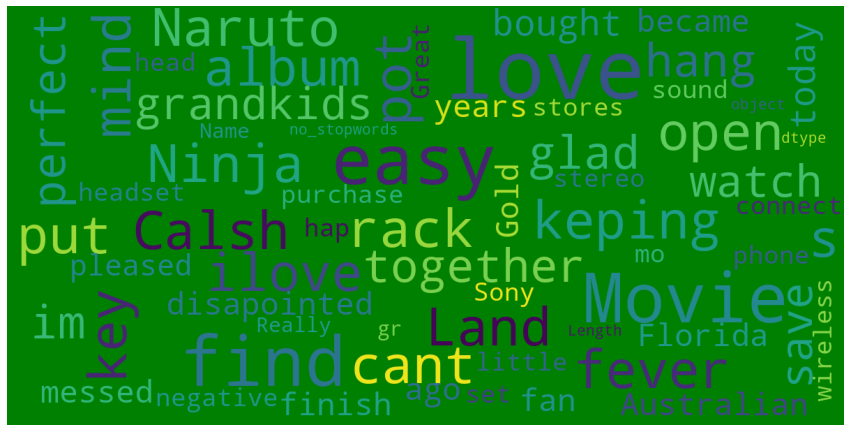

In [39]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def dispwordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='Green',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

dispwordcloud(df.loc[df['reviews.didPurchase'] == True, 'no_stopwords'])

- These words are commonly used by customers who have purchased and reviewed the product: contact, dry, feeling, helps, lenses, fragrance, jelly, bought, hand, part, loved, eye, cream, refreshing, flavor, better, still, disinfect. 

### Most used words in the fake review

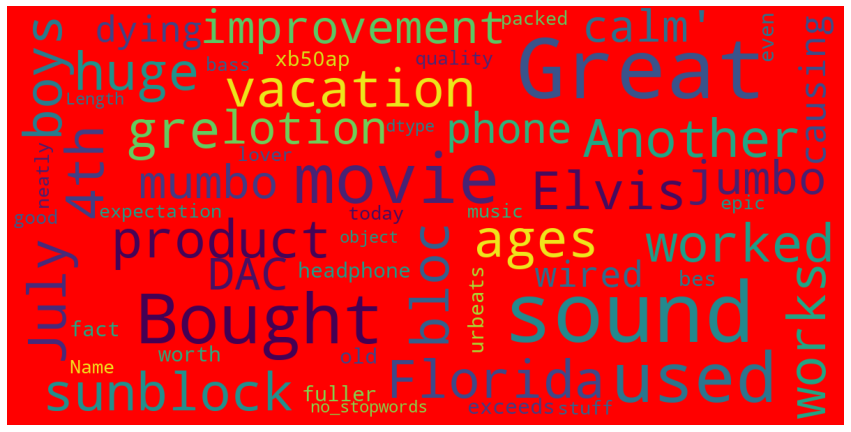

In [40]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def dispwordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='Red',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

dispwordcloud(df.loc[df['reviews.didPurchase'] == False, 'no_stopwords'])

- These words have been used by customers who reviewed the product but did not make a purchase: bought, earlier, lubr, gel, today, great, impressed, bedroom, things, starting, based, price, contacts, stuff, boyfriend, spice, caused.


### Rating distribution for the reviews

In [41]:
import plotly.offline as py

In [42]:
cnt_srs = df['reviews.rating'].value_counts().head()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=cnt_srs.values[::-1],
        colorscale = 'Reds',
        reversescale = True
    ),
)

layout = dict(
    title='Ratings distribution',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Ratings")

- Here are the ratings submitted by customers on the product:

- 21217k people have given a rating of 5.
- 5250 people have given a rating of 4.
- 1587 people have given a rating of 3.
- 962 people have given a rating of 2.
- 2356 people have given a rating of 1.

In [43]:
#adding a column with the length of review text
df['len_review'] = df['no_stopwords'].apply(lambda x: len(x.split()))

In [44]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [45]:
y0 = df.loc[df['reviews.rating'] == 5]['len_review']
y1 = df.loc[df['reviews.rating'] == 4]['len_review']
y2 = df.loc[df['reviews.rating'] == 3]['len_review']
y3 = df.loc[df['reviews.rating'] == 2]['len_review']
y4 = df.loc[df['reviews.rating'] == 1]['len_review']


trace0 = go.Box(
    y=y0,
    name = 'Rating 5',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Rating 4',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Rating 3',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Rating 2',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Rating 1',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)

data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "Review length Boxplot of Ratings"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Review Length Boxplot of Ratings")

<AxesSubplot:xlabel='reviews.didPurchase', ylabel='count'>

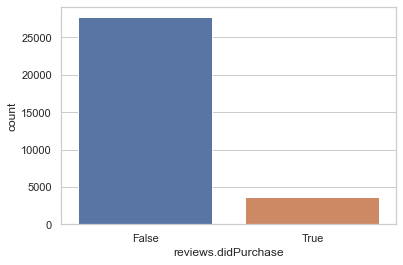

In [46]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["reviews.didPurchase"])

In [47]:
y0 = df.loc[df['reviews.didPurchase'] == True]['len_review']
y1 = df.loc[df['reviews.didPurchase'] == False]['len_review']


trace0 = go.Box(
    y=y0,
    name = 'Genuine reviews',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Fake reviews',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title = "Review length Boxplot of Genuine/Fake reviews"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Review length Boxplot of Genuine/Fake reviews")

In [48]:
df['reviews.title'].unique()

array(['Great DVD', 'What a great idea!', 'Sunburned Children!', ...,
       'Great sound quality', 'Amazingly good product!!!',
       'BASS oh BASS!'], dtype=object)

<AxesSubplot:title={'center':'Rating wise helpful reviews'}, ylabel='reviews.numHelpful'>

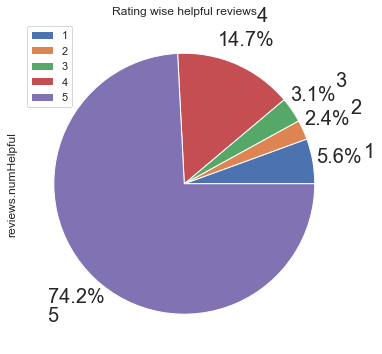

In [49]:
df.groupby(['reviews.rating']).sum().plot(kind='pie',y= 'reviews.numHelpful',radius = 1,title=
 "Rating wise helpful reviews",autopct='%1.1f%%',fontsize=20,figsize=(6, 6),pctdistance=1.2,labeldistance=1.4)

- It is evident that 74.2 percent of customers have given a rating of 5
- It can be observed that 14.7 percent of customers have given a rating of 4.
- Customers have given a rating of 3 to 3.1 percent of the total.
- There are 2.4 customers out of 100 that have given a rating of 2. 
- 5.6 percent of the total have ratings from 1  given by customers.

In [50]:
import string

In [51]:
df['reviews.title'] = df['reviews.title'].astype(str)

In [52]:
df['no_punc'] = df['reviews.title'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [53]:
df['Lower'] = df['no_punc'].apply(lambda x: x.lower())


<AxesSubplot:>

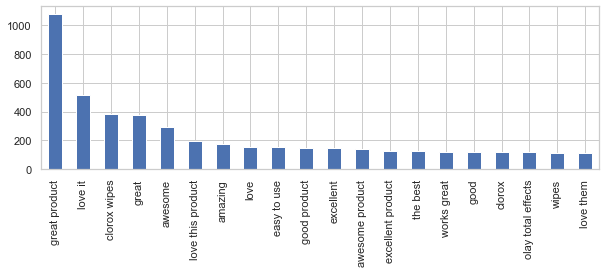

In [54]:
df['Lower'].value_counts().head(20).plot.bar(figsize = (10,3))

- Based on the map above, it is evident that "great product" is a commonly used phrase among customers in their reviews. Additionally, "love it" is another phrase that is frequently used by customers. 

<AxesSubplot:>

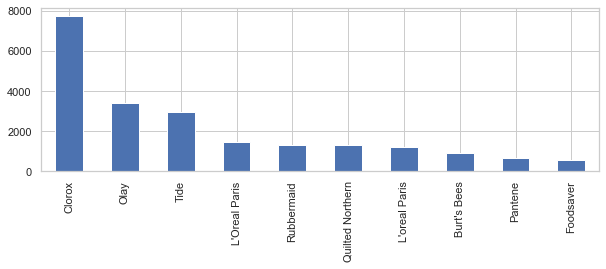

In [55]:
#brand
df['brand'].value_counts().head(10).plot.bar(figsize = (10,3))

- It is evident that Clorox stands out as a leading brand, outperforming other brands with its high customer ratings and maximum sales figures
- Universal Home Video holds the position of the second most recognized brand on a scale of 1 to 10 brands.

<AxesSubplot:>

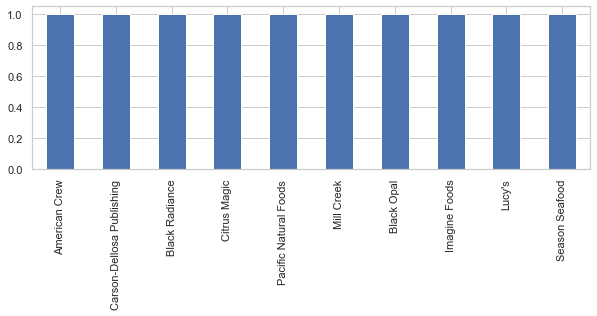

In [56]:
df['brand'].value_counts().tail(10).plot.bar(figsize = (10,3))

In [57]:
df['manufacturer'].nunique()

298

<AxesSubplot:>

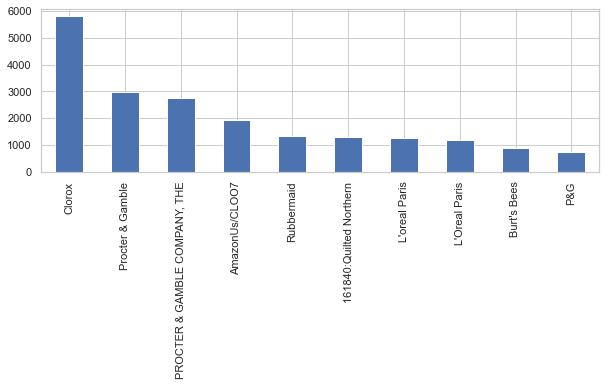

In [58]:
df['manufacturer'].value_counts().head(10).plot.bar(figsize = (10,3))

<AxesSubplot:>

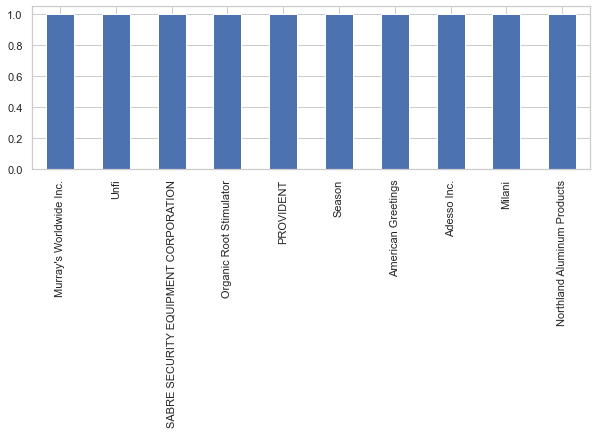

In [59]:
df['manufacturer'].value_counts().tail(10).plot.bar(figsize = (10,3))

In [60]:
# Function which returns DataFrame containing count and percentage of null values for each column
def null(dataframe):
    temp_series = dataframe.isna().sum(axis = 0)
    df_null = pd.DataFrame([temp_series, round(temp_series * 100/ dataframe.shape[0], 2)], index = ['Count', 'Percentage']).T.sort_values('Percentage', ascending = False)
    return df_null

In [61]:
null(df)

Count  Percentage
reviews.numHelpful   25062.0       79.89
ean                   6941.0       22.12
reviews.doRecommend   4951.0       15.78
manufacturerNumber     179.0        0.57
no_punc                  0.0        0.00
len_review               0.0        0.00
no_stopwords             0.0        0.00
upc                      0.0        0.00
reviews.username         1.0        0.00
reviews.title            0.0        0.00
reviews.text             0.0        0.00
reviews.sourceURLs       0.0        0.00
reviews.rating           0.0        0.00
id                       0.0        0.00
reviews.id               0.0        0.00
brand                    0.0        0.00
reviews.didPurchase      0.0        0.00
reviews.dateSeen         0.0        0.00
reviews.dateAdded        0.0        0.00
reviews.date             0.0        0.00
name                     0.0        0.00
manufacturer             0.0        0.00
keys                     0.0        0.00
categories               0.0        0.00
Lower                    0.0        0.00

In [62]:
df['category'] = df['categories'].apply(lambda x: (str(x).split(","))[0])

In [63]:
data = [
    go.Bar(
        x=df['category'].value_counts().keys(),
        y=df['category'].value_counts(),
        orientation='v',
    )]
layout = go.Layout(
    height=500,
    title='Number of products per category',
    hovermode='x unified',
    xaxis=dict(title='Category', ticklen=5, zeroline=False, gridwidth=2, domain=[0.1, 1]),
    yaxis=dict(title='Count', ticklen=5, gridwidth=2),
    showlegend=False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Sector/ Area of Coaches - Combined')

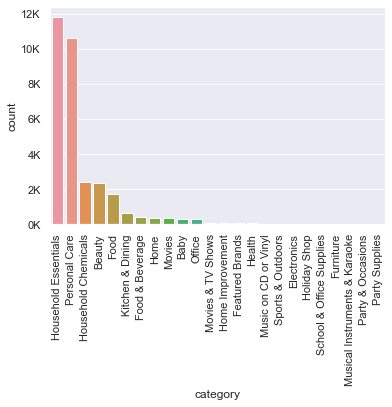

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.countplot(x ='category', data = df, order = df.groupby('category')['id'].count().sort_values(ascending = False).index)
plt.xticks(rotation=90)
plt.yticks(ticks = np.arange(0, 13000, 2000),labels = [str(i//1000) + 'K' for i in np.arange(0, 13000, 2000)])
 
# Show the plot
plt.show()

- In total, there were 12.48k reviews for household essential products, with 10.593k reviews for personal care products. Additionally, 2330 reviews were submitted for beauty products by customers.


In [65]:
df['website'] = df['reviews.sourceURLs'].apply(lambda x: (str(x).split("."))[1])

In [66]:
print(df['website'].unique())

['walmart']


In [67]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

- correlation matrix that shows the relationship between three variables - the number of helpful reviews, the rating given by customers, and the length of the reviews.

- The matrix shows that there is a weak negative correlation (-0.003582) between the number of helpful reviews and the rating given by customers, which suggests that higher ratings may not necessarily be associated with more helpful reviews.

- There is also a weak negative correlation (-0.184657) between the rating given by customers and the length of the reviews, which suggests that customers may not necessarily write longer reviews for products that they rate more positively.

- Finally, there is a moderate positive correlation (0.289753) between the length of the reviews and the number of helpful reviews, which suggests that longer reviews may be perceived as more helpful by other customers.

### Model Building

***************************************************

In [68]:
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [69]:
# Converting all the words to lower case
df['processed_words'] = df['reviews.text'].apply(lambda x: x.lower())

# Removing the stop words from review text

df['processed_words'] = df['processed_words'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw_nltk)]))

# removing digits from the text

df['processed_words'] = df['processed_words'].apply(lambda x: re.sub('[^a-zA-Z\s]', '', x))


# replacing spaces with a single space

df['processed_words'] = df['processed_words'].apply(lambda x: re.sub('\s+', ' ', x))

In [70]:
# Stemmering the data to remove the parts of speech

stemmer = PorterStemmer()
wnl = WordNetLemmatizer()

df['processed_words'] =  df['processed_words'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

df['processed_words'] =  df['processed_words'].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in word_tokenize(x)]))

In [71]:
# X and Y to the model

y = df['reviews.rating']
X = df['processed_words']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [72]:
# building a logistic regression model with 500 features

piped_model = Pipeline(steps=[("Word Vecorizer", TfidfVectorizer(ngram_range=(1, 3), max_features=50000)),
                       ("Selecting K best features", SelectKBest(score_func=chi2, k=500)),
                           ("classifier", LogisticRegression(solver='liblinear'))])

piped_model.fit(X_train, y_train)

Pipeline(steps=[('Word Vecorizer',
                 TfidfVectorizer(max_features=50000, ngram_range=(1, 3))),
                ('Selecting K best features',
                 SelectKBest(k=500,
                             score_func=<function chi2 at 0x000002C4C2FF35E0>)),
                ('classifier', LogisticRegression(solver='liblinear'))])

In [73]:
# Classification report for the train data

print(classification_report(piped_model.predict(X_train), y_train))

              precision    recall  f1-score   support

           1       0.53      0.71      0.61      1393
           2       0.01      0.62      0.01         8
           3       0.01      0.45      0.01        20
           4       0.07      0.40      0.11       686
           5       0.99      0.73      0.84     22990

    accuracy                           0.72     25097
   macro avg       0.32      0.58      0.32     25097
weighted avg       0.94      0.72      0.81     25097



In [74]:
# Classification report for the test data

print(classification_report(piped_model.predict(X_test), y_test))

              precision    recall  f1-score   support

           1       0.54      0.74      0.63       362
           2       0.00      0.00      0.00         2
           3       0.00      0.17      0.01         6
           4       0.06      0.36      0.10       175
           5       0.99      0.73      0.84      5730

    accuracy                           0.72      6275
   macro avg       0.32      0.40      0.32      6275
weighted avg       0.94      0.72      0.81      6275



We can see that the model was able to predict rating-5 when compared to other ratings.

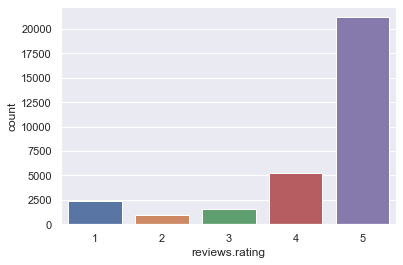

In [75]:
sns.countplot(y)
plt.show()

From the above plot, it can be infered that there are more 5-rating examples when compared to 1,2,3,4.
We have to under sample the data. Because over sampling can increase the data size by 5 times.

# Under sampling the data

In [76]:
from imblearn.under_sampling import RandomUnderSampler

In [77]:
ros = RandomUnderSampler()
vectoriser = TfidfVectorizer(ngram_range=(1, 3), max_features=50000)

X = vectoriser.fit_transform(X)

X, y = ros.fit_resample(X, y)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [79]:
# Defining the models
lr_model = LogisticRegression(solver='liblinear')
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svc_model = SVC(kernel = 'rbf')

# Storing those models in a dictionary
models = {'Logistic_Regression': lr_model,
          'Decision_Tree_Classifier':dt_model,
          'Random_Forest_Classifier': rf_model,
          'Support_Vector_Machine': svc_model}

# storing the values of k which is the top k-features we use by using CHI2 and Select K best
k_features = [5, 100, 500, 10000]


# Iterating over models and k values and calculating accuracy scores
for model_name, model in models.items():
    globals()[model_name] = pd.DataFrame(index = k_features, columns = ['Train_accuracy', 'Test_accuracy'])
    for k in k_features:
        
        # This is a pipeline of vectorization, selectkbest and a classification model
        piped_model = Pipeline(steps=[("Selecting K best features", SelectKBest(score_func=chi2, k=k)),
                           ("classifier", model)])
        piped_model.fit(X_train, y_train)
        
        globals()[model_name].loc[k,:] = [accuracy_score(piped_model.predict(X_train), y_train),
                                           accuracy_score(piped_model.predict(X_test), y_test)]

In [80]:
# Define Data

def plot_graph(df_name):
    
    df = globals()[df_name]
    df = df.sort_index(ascending = False)
    
    k_features_reverse = k_features[::-1]
    sample = ['Top_' + str(k) + '_features' for k in k_features_reverse]

    x_axis = np.arange(len(sample)) * 1.5

    # Multi bar Chart

    plt.figure(figsize = (10, 3))
    plt.bar(x_axis +0.20, df['Train_accuracy'], width=0.2, label = 'Train Accuracy')
    plt.bar(x_axis +0.20*2, df['Test_accuracy'], width=0.2, label = 'Test Accuracy')
    
    
    # Title
    plt.title(df_name, fontweight = "bold")
    plt.xlabel('Top K features')
    plt.ylabel('Accuracy Score')
    

    # Xticks

    plt.xticks(x_axis + 0.4, sample, rotation = 90)

    # Add legend

    plt.legend(loc = 'upper left', bbox_to_anchor=(0, 1.3))

    # Display

    plt.show()

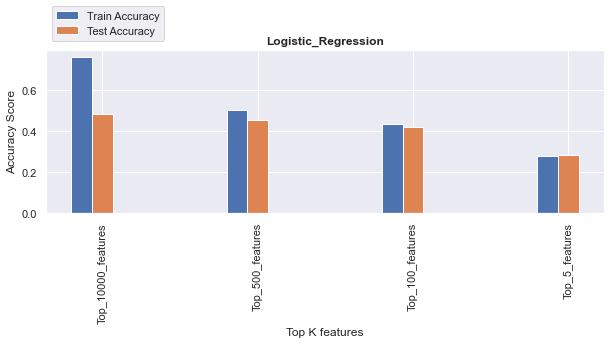

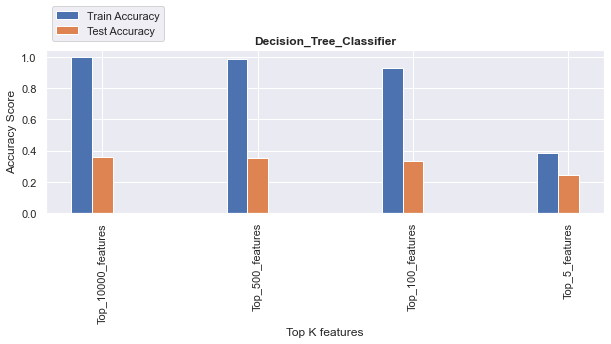

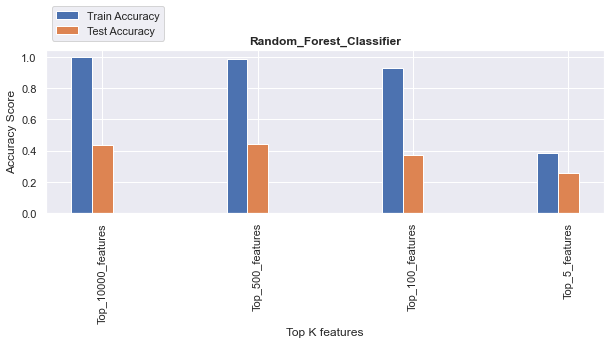

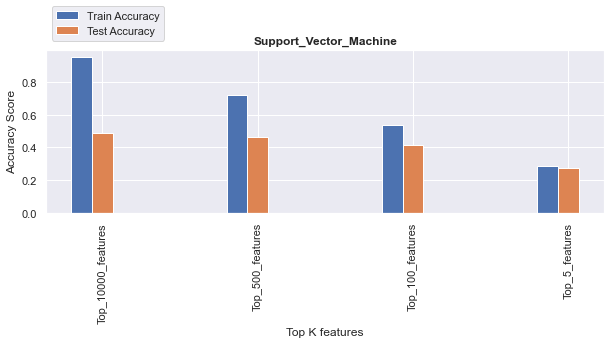

In [81]:
# Plotting the train and test accuracies for each model

for model_name in models.keys():
    plot_graph(model_name)

In [82]:
# Finding the top 25 words of the Corpus

select = SelectKBest(score_func=chi2, k=25)

select.fit(X_train, y_train)

np.array(vectoriser.get_feature_names())[select.get_support()]

array(['back', 'back old', 'back old formula', 'bring', 'bring back',
       'bring back old', 'broke', 'clean', 'clorox', 'cloth',
       'disappoint', 'formula', 'gel', 'horribl', 'mop', 'new',
       'new formula', 'nexxu', 'old', 'old formula', 'review collect',
       'review collect part', 'skin', 'spray', 'wipe'], dtype='<U35')

In [83]:
# building a logistic regression model with 500 features

piped_model = Pipeline(steps=[("Selecting K best features", SelectKBest(score_func=chi2, k=500)),
                           ("classifier", LogisticRegression(solver='liblinear'))])

piped_model.fit(X_train, y_train)

Pipeline(steps=[('Selecting K best features',
                 SelectKBest(k=500,
                             score_func=<function chi2 at 0x000002C4C2FF35E0>)),
                ('classifier', LogisticRegression(solver='liblinear'))])

In [84]:
# Classification report for the train data

print(classification_report(piped_model.predict(X_train), y_train))

              precision    recall  f1-score   support

           1       0.69      0.57      0.63       959
           2       0.35      0.48      0.40       570
           3       0.44      0.42      0.43       801
           4       0.34      0.46      0.39       571
           5       0.68      0.55      0.61       947

    accuracy                           0.50      3848
   macro avg       0.50      0.49      0.49      3848
weighted avg       0.54      0.50      0.51      3848



In [85]:
# Classification report for the test data

print(classification_report(piped_model.predict(X_test), y_test))

              precision    recall  f1-score   support

           1       0.66      0.50      0.57       228
           2       0.32      0.42      0.37       142
           3       0.38      0.37      0.38       209
           4       0.28      0.40      0.33       142
           5       0.65      0.51      0.57       241

    accuracy                           0.45       962
   macro avg       0.46      0.44      0.44       962
weighted avg       0.49      0.45      0.46       962



## Fake reviews identification

In [86]:
target=df['reviews.didPurchase'].astype('int')